In [20]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats import normaltest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import cross_val_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
from sklearn.tree import export_graphviz
from sklearn import tree
import itertools
import pickle




import warnings
warnings.filterwarnings("ignore")


In [7]:
MID_Total = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/cleaned/MID_Total.csv')
MID_no_mate = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/cleaned/MID_no_mate.csv')

In [8]:
MID_Total = MID_Total.replace(np.nan, -9)
MID_no_mate = MID_no_mate.replace(np.nan, -9)

In [68]:
MID_Total.to_pickle('/Users/NickThomas/Project_Mcnulty/data/pickle/MID_Total.pkl')
MID_no_mate.to_pickle('/Users/NickThomas/Project_Mcnulty/data/pickle/MID_no_mate.pkl')

In [9]:
MID_Total.head()

,DispNum3,DispNum4_A,StDay_A,StMon_A,StYear_A,EndDay_A,EndMon_A,EndYear_A,Outcome,Settle,...,RevState,RevType1,RevType2,Fatality_B,FataPre,HiAct_B,HostLev_B,Orig,Version_B,Stalemate
0,2,-9.0,-9.0,7,1902,24.0,1,1903,6.0,1.0,...,1,1,-9.0,0.0,0.0,0,1,1,4.01,0
1,2,-9.0,-9.0,7,1902,24.0,1,1903,6.0,1.0,...,1,1,-9.0,0.0,0.0,7,3,1,4.01,0
2,3,-9.0,2.0,5,1913,25.0,10,1913,4.0,3.0,...,0,0,-9.0,0.0,0.0,0,1,1,4.01,0
3,3,-9.0,2.0,5,1913,25.0,10,1913,4.0,3.0,...,1,2,-9.0,0.0,0.0,8,3,1,4.01,0
4,4,-9.0,15.0,5,1946,13.0,11,1946,5.0,3.0,...,0,0,-9.0,0.0,0.0,16,4,1,4.01,1


In [12]:
b = MID_no_mate.DispNum3 == 4069
b.value_counts()

False    2028
True        2
Name: DispNum3, dtype: int64

In [13]:
MID_Total = MID_Total.replace('147W', '147')
x_list = (['Settle', 'Fatality_B', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X2 = MID_Total[x_list]
y2 = MID_Total.Stalemate
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2, random_state=42)
ss = StandardScaler()
X2_train = ss.fit_transform(X2_train)
X2_test = ss.transform(X2_test)

In [14]:
"""param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf2, param_grid=param_grid)
grid_search.fit(X2, y2)
grid_search.cv_results_"""

'param_grid = {"max_depth": [3, None],\n              "max_features": [1, 3, 10],\n              "min_samples_split": [2, 3, 10],\n              "min_samples_leaf": [1, 3, 10],\n              "bootstrap": [True, False],\n              "criterion": ["gini", "entropy"]}\n\n# run grid search\ngrid_search = GridSearchCV(rf2, param_grid=param_grid)\ngrid_search.fit(X2, y2)\ngrid_search.cv_results_'

In [15]:
#train_df2 = X2_train.copy()
#train_df2['Stalemate'] = y2_train
#sns.pairplot(train_df2, hue='Stalemate')

In [16]:
rf2 = RandomForestClassifier(n_estimators=50, max_depth=15)
rf2.fit(X2_train, y2_train)
print(rf2.score(X2_test, y2_test))
print(rf2.score(X2_train, y2_train))

0.8932203389830509
0.9514624841034337


In [22]:
with open('Random_Forest_Stalemate.pkl', 'wb') as picklefile:
        pickle.dump(rf2, picklefile)

In [23]:
lm2 = LogisticRegression(C=1000)
lm2.fit(X2_train, y2_train)
lm2.score(X2_test, y2_test)

0.8059322033898305

In [24]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.8457627118644068

In [25]:
from sklearn.svm import LinearSVC

svc2 = LinearSVC()
svc2.fit(X2_train, y2_train)
svc2.score(X2_test, y2_test)

0.7694915254237288

In [26]:
dt2 = DecisionTreeClassifier(max_depth=15)
dt2.fit(X2_train, y2_train)
dt2.score(X2_test, y2_test)

0.8550847457627119

In [27]:
rf2.predict(X2[36:38])

array([1, 0])

In [28]:
MID_Total.StAbb[36:38]

36    IRN
37    USR
Name: StAbb, dtype: object

In [29]:
bc2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=50, n_jobs=1)
bc2.fit(X2_train, y2_train)
print(bc2.score(X2_test, y2_test))
print(bc2.score(X2_train, y2_train))

0.8822033898305085
0.97011445527766


In [30]:
for feat, imp in zip(range(1, 12), rf2.feature_importances_):
    print("Feat %i: "%feat, imp)

Feat 1:  0.46165072436359117
Feat 2:  0.03313533507355921
Feat 3:  0.07069678559784803
Feat 4:  0.14111078269636643
Feat 5:  0.042161044739695355
Feat 6:  0.014380052288191357
Feat 7:  0.0625810203379743
Feat 8:  0.03417473347500635
Feat 9:  0.12175993892636448
Feat 10:  0.01834958250140347


In [31]:
print(rf2.decision_path(X2_train))
print(rf2.apply(X2_train))

(<4718x40022 sparse matrix of type '<class 'numpy.int64'>'
	with 3005187 stored elements in Compressed Sparse Row format>, array([    0,   723,  1472,  2187,  2874,  3673,  4480,  5405,  6188,
        7003,  7710,  8483,  9302,  9935, 10630, 11315, 12074, 13069,
       13880, 14733, 15600, 16437, 17266, 17947, 18834, 19625, 20572,
       21295, 22078, 22887, 23700, 24583, 25500, 26409, 27222, 28029,
       28886, 29795, 30740, 31559, 32362, 32999, 33672, 34531, 35252,
       36077, 36842, 37463, 38172, 39239, 40022]))
[[ 720  697  676 ...  662 1029  689]
 [ 314  498   97 ...  210  143  278]
 [ 136  713  569 ...  672  326  699]
 ...
 [ 213  747  714 ...  139  326  782]
 [  18   79  399 ...   53  306   31]
 [ 214  719  714 ...  708  407  724]]


In [32]:
cm2 = confusion_matrix(y2_test, rf2.predict(X2_test))
cm2

array([[348,  85],
       [ 41, 706]])

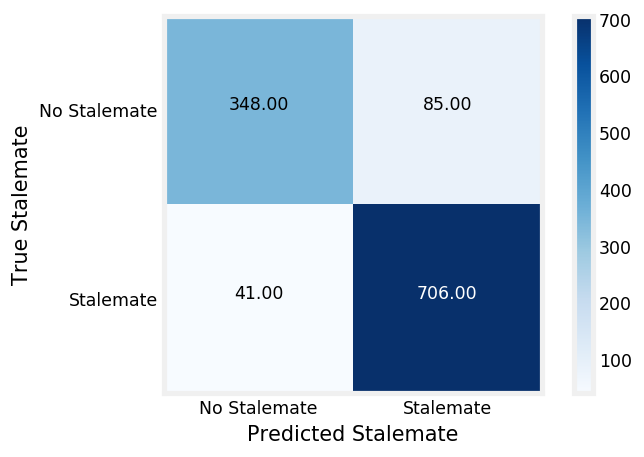

In [33]:
cm2 = confusion_matrix(y2_test, rf2.predict(X2_test))
plt.figure(dpi=125)
plt.imshow(cm2, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1], ('No Stalemate', 'Stalemate'))
plt.yticks([0,1], ('No Stalemate', 'Stalemate'));
plt.ylabel("True Stalemate")
plt.xlabel("Predicted Stalemate");
fmt = '.2f'
thresh = cm2.max() / 2.
for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
    plt.text(j, i, format(cm2[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm2[i, j] > thresh else "black")

In [34]:
print(classification_report(y2_test, rf2.predict(X2_test)))
print(classification_report(y2_test, bc2.predict(X2_test)))

             precision    recall  f1-score   support

          0       0.89      0.80      0.85       433
          1       0.89      0.95      0.92       747

avg / total       0.89      0.89      0.89      1180

             precision    recall  f1-score   support

          0       0.87      0.80      0.83       433
          1       0.89      0.93      0.91       747

avg / total       0.88      0.88      0.88      1180



In [35]:
roc_auc_score(y2_test,rf2.predict(X2_test))

0.8744044693013779

In [36]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [37]:
roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(X2_train, y2_train)
    preds = clf.predict_proba(X2_test)
    fpr, tpr, _ = roc_curve(y2_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))

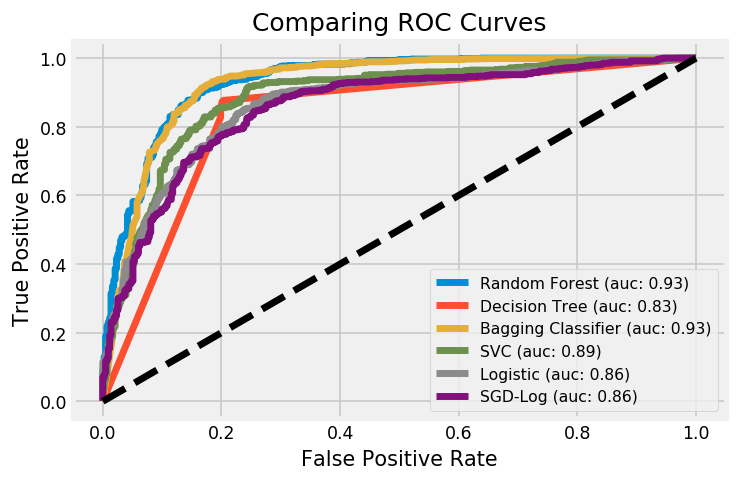

In [38]:
plt.figure(dpi=125)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");

In [39]:
cross_val_score(rf2, X2, y2, cv=10, scoring='accuracy')

array([0.80508475, 0.79661017, 0.86440678, 0.84745763, 0.89661017,
       0.8220339 , 0.78983051, 0.83728814, 0.85059423, 0.86247878])

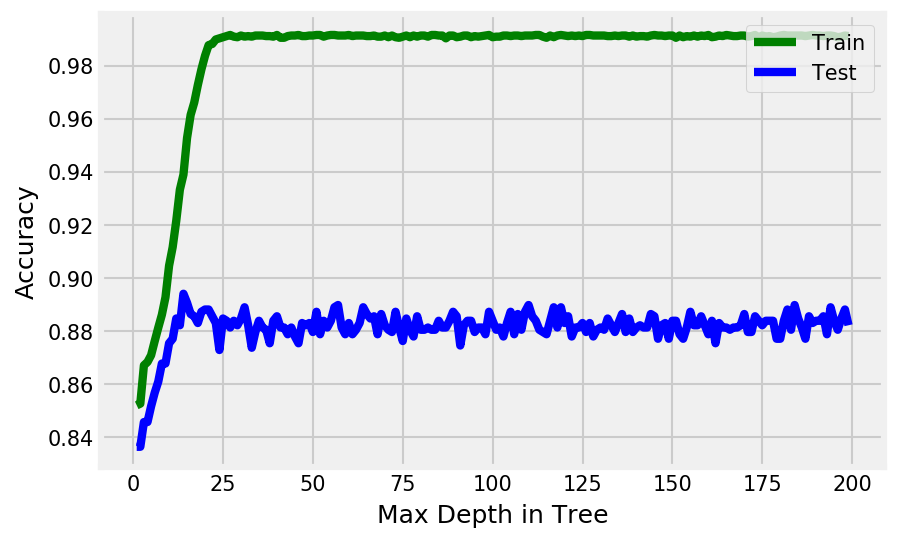

In [40]:
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X2_train, y2_train)
    train_score.append(dt.score(X2_train, y2_train))
    test_score.append(dt.score(X2_test, y2_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

In [41]:
#plot_learning_curve(rf2, "Learning Curve for Random Forest", X2, y2)

In [42]:
MID_no_mate.StAbb[18:22]

18    JPN
19    UKG
20    USA
21    FRN
Name: StAbb, dtype: object

In [43]:
x_list = (['Settle', 'Fatality_B', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X = MID_no_mate[x_list]
y = MID_no_mate.Outcome
#X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [44]:
MID_no_mate.Outcome.value_counts()

1.0    436
7.0    397
4.0    369
6.0    345
2.0    243
3.0    181
9.0     59
Name: Outcome, dtype: int64

In [45]:
rf = RandomForestClassifier(n_estimators=50, max_depth=15)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.7684729064039408
0.9839901477832512


In [46]:
with open('Random_Forest_Outcome.pkl', 'wb') as picklefile:
        pickle.dump(rf, picklefile)

In [47]:
rf.get_params(X_train.any())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
lm = LogisticRegression(C=1000)
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.4729064039408867

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5862068965517241

In [50]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.4753694581280788

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7586206896551724

In [52]:
rf.predict_proba(X[18:22])

array([[0.56, 0.36, 0.04, 0.02, 0.  , 0.  , 0.02],
       [0.54, 0.24, 0.  , 0.02, 0.  , 0.  , 0.2 ],
       [0.56, 0.22, 0.  , 0.06, 0.  , 0.02, 0.14],
       [0.58, 0.22, 0.  , 0.06, 0.  , 0.02, 0.12]])

In [53]:
bc = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=15), n_estimators=50, n_jobs=1)
bc.fit(X_train, y_train)
print(bc.score(X_train, y_train))
print(bc.score(X_test, y_test))

0.9624384236453202
0.7660098522167488


In [54]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [56]:
MID_no_mate.Outcome.unique()

array([6., 4., 1., 3., 2., 9., 7.])

No handles with labels found to put in legend.


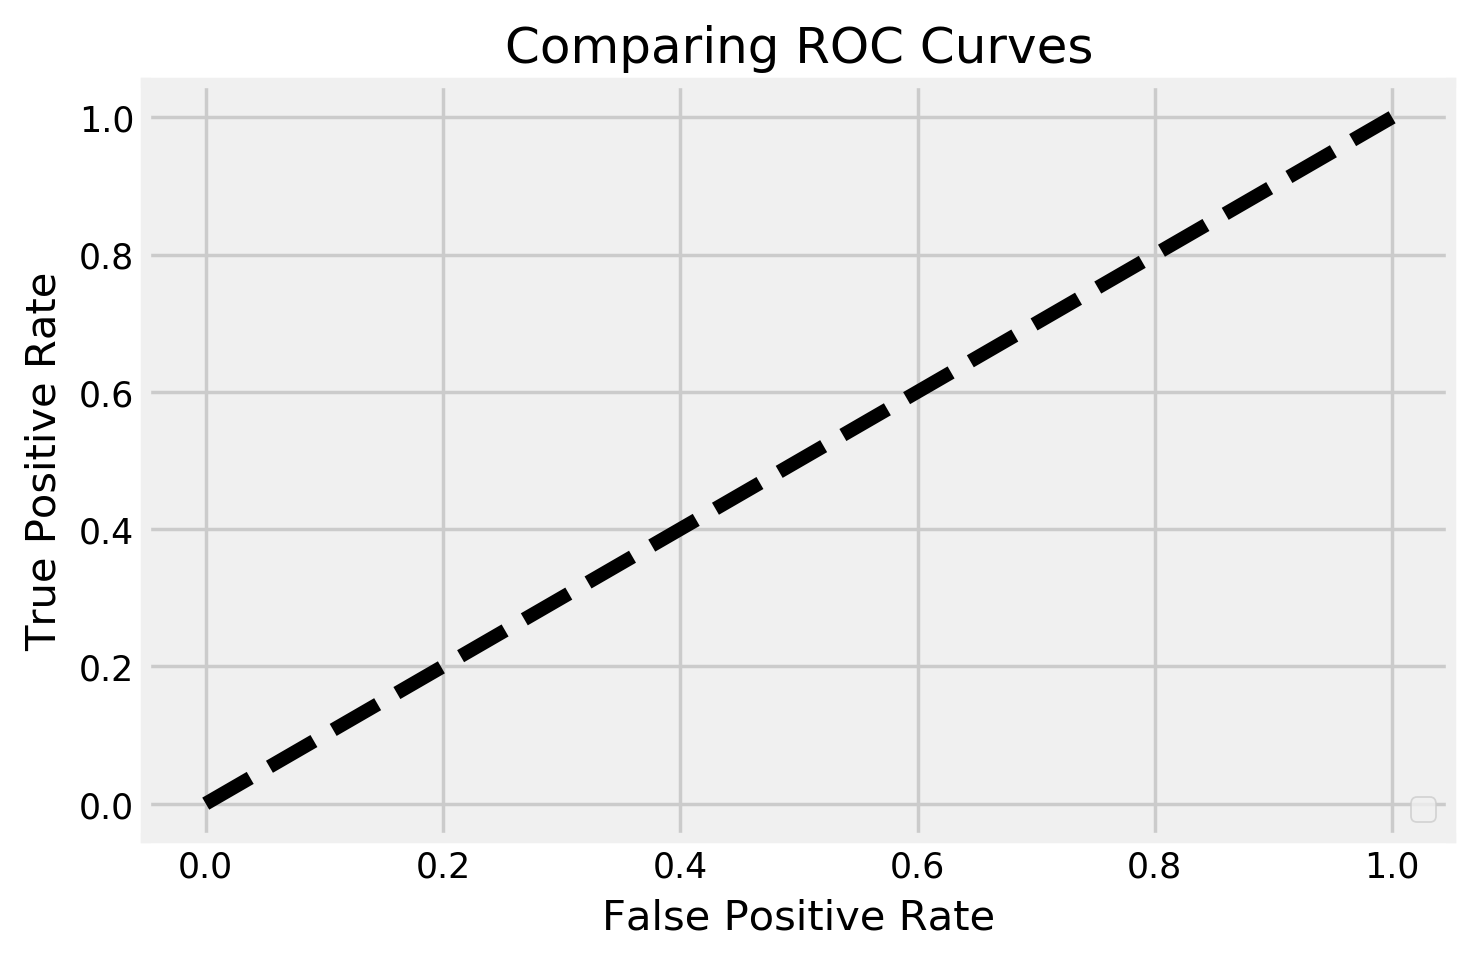

In [58]:
plt.figure(dpi=250)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");

In [60]:
for feat, imp in zip(range(1, 12), rf.feature_importances_):
    print("Feat %i: "%feat, imp)

Feat 1:  0.15580546567705825
Feat 2:  0.051204697380564684
Feat 3:  0.13495857063694502
Feat 4:  0.2214348182638712
Feat 5:  0.04546032107395472
Feat 6:  0.04133874347877692
Feat 7:  0.10845240416874058
Feat 8:  0.06867541061757304
Feat 9:  0.14962823656935745
Feat 10:  0.02304133213315831


In [61]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cm

array([[65,  6,  0,  1,  3,  2,  0],
       [ 4, 37,  0,  3,  1,  1,  0],
       [ 2,  0, 24,  5,  8,  4,  1],
       [ 8,  0,  2, 50, 12,  7,  0],
       [ 0,  0,  1,  5, 57,  4,  0],
       [ 0,  0,  1,  6,  5, 67,  1],
       [ 1,  0,  0,  0,  0,  0, 12]])

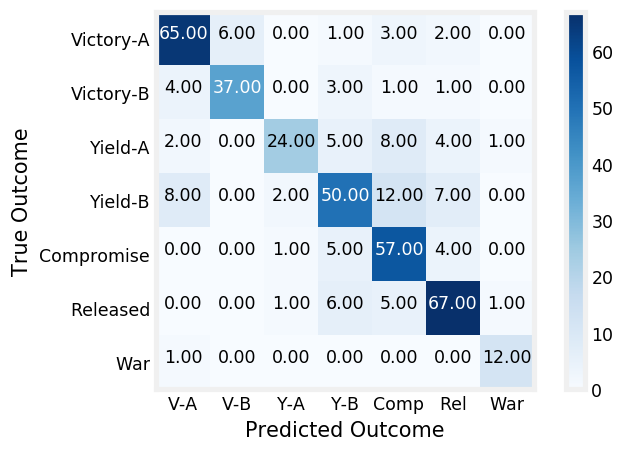

In [62]:
names = ['Victory-SideA', 'Victory-SideB', 'Yield-SideA', 'Yield-SideB', 'Compromise', 'Released', 'Joins ongoing War']
plt.figure(dpi=125)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6], ('V-A', 'V-B', 'Y-A', 'Y-B', 'Comp', 'Rel', 'War'))
plt.yticks([0,1,2,3,4,5,6], ('Victory-A', 'Victory-B', 'Yield-A', 'Yield-B', 'Compromise', 'Released', 'War'));
plt.ylabel("True Outcome")
plt.xlabel("Predicted Outcome");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [63]:
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.81      0.84      0.83        77
        2.0       0.86      0.80      0.83        46
        3.0       0.86      0.55      0.67        44
        4.0       0.71      0.63      0.67        79
        6.0       0.66      0.85      0.75        67
        7.0       0.79      0.84      0.81        80
        9.0       0.86      0.92      0.89        13

avg / total       0.78      0.77      0.77       406



In [64]:
cross_val_score(rf, X, y, cv=10, scoring='accuracy')

array([0.46116505, 0.62439024, 0.66829268, 0.62745098, 0.60784314,
       0.65024631, 0.55445545, 0.62189055, 0.73134328, 0.71859296])

In [65]:
#plot_learning_curve(rf, "Learning Curve for Random Forest", X, y)

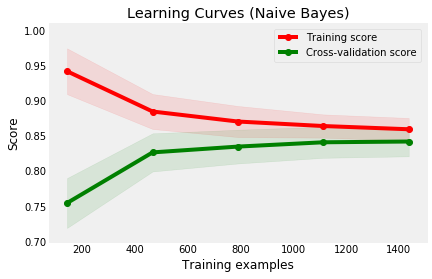

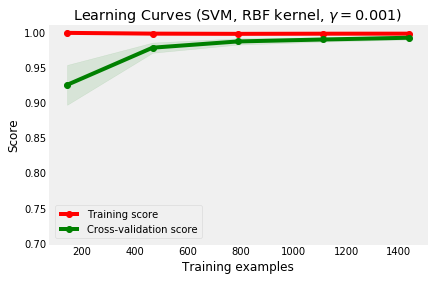

In [66]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

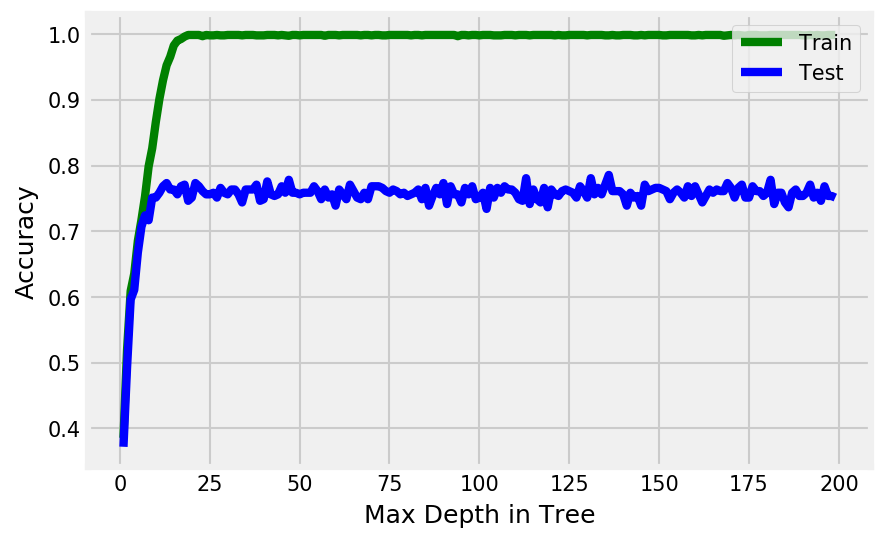

In [67]:
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");